In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [234]:
df = pd.read_csv("train.csv") 

In [235]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


## Outliers

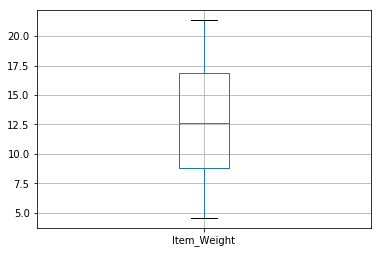

In [236]:
df.boxplot(column="Item_Weight")

In [237]:
#df.drop(df[df["Item_Visibility"]>0.19].index,inplace=True)

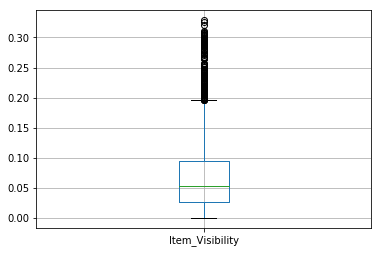

In [238]:
df.boxplot(column="Item_Visibility")

In [239]:
df["Item_Visibility"].replace(to_replace=0, value=df["Item_Visibility"].median(),inplace=True)

In [240]:
#df["Item_Outlet_Sales"] = 1/np.log(df["Item_Outlet_Sales"])

In [241]:
#df.drop(df[df["Item_Outlet_Sales"]>6200].index,inplace=True)

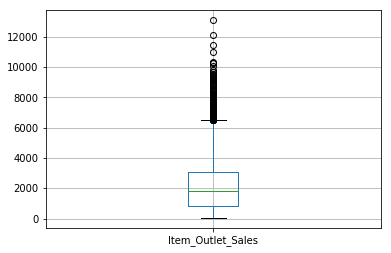

In [242]:
df.boxplot(column="Item_Outlet_Sales")

In [243]:
count=0
for i in df["Item_Outlet_Sales"]:
    if(i>6200):
        count+=1
count

238

In [244]:
#df.drop(df[df["Item_Outlet_Sales"]>6200].index,inplace=True)

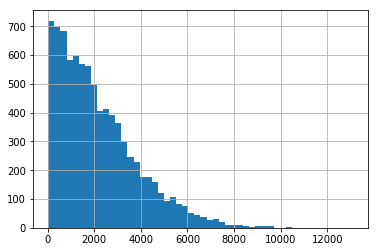

In [245]:
df["Item_Outlet_Sales"].hist(bins=50)

## Missing Values

In [246]:
df["Item_Weight"].fillna(df["Item_Weight"].mean(),inplace=True)

In [247]:
df["Outlet_Size"].fillna("Medium",inplace=True)

In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


## Encoding

In [249]:
df["Item_Fat_Content"].replace(to_replace='LF' , value =0,inplace=True)
df["Item_Fat_Content"].replace(to_replace='Low Fat' , value =0,inplace=True)
df["Item_Fat_Content"].replace(to_replace='low fat' , value =0,inplace=True)
df["Item_Fat_Content"].replace(to_replace='Regular' , value =1,inplace=True)
df["Item_Fat_Content"].replace(to_replace='reg' , value =1,inplace=True)

In [250]:
set(df["Item_Fat_Content"])

{0, 1}

In [251]:
dummy=['Baking Goods','Breads','Breakfast','Canned','Dairy','Frozen Foods','Fruits and Vegetables','Hard Drinks','Health and Hygiene',
 'Household','Meat','Others','Seafood','Snack Foods','Soft Drinks','Starchy Foods']

In [252]:
n=0
for i in dummy:
    df["Item_Type"].replace(to_replace=i , value =n,inplace=True)
    n=n+1

In [253]:
L=['High', 'Medium', 'Small']
n=0
for i in L:
    df["Outlet_Size"].replace(to_replace=i , value =n,inplace=True)
    n=n+1

In [254]:
L=['Tier 1', 'Tier 2', 'Tier 3']
n=0
for i in L:
    df["Outlet_Location_Type"].replace(to_replace=i , value =n,inplace=True)
    n=n+1


In [255]:
L=['Grocery Store',
 'Supermarket Type1',
 'Supermarket Type2',
 'Supermarket Type3']
n=0
for i in L:
    df["Outlet_Type"].replace(to_replace=i , value =n,inplace=True)
    n=n+1

In [256]:
len(set(df["Outlet_Identifier"]))

10

In [257]:
#n=0
#L=['FDZ57', 'FDC28', 'FDV40', 'FDX21', 'FDZ52', 'FDD36', 'FDW09', 'FDG10', 'FDH53', 'FDM13', 'FDB02', 'FDY59', 'FDK20', 'FDS14', 'FDR04', 'FDI05', 'FDO32', 'FDI36', 'DRC13', 'NCD30', 'FDP51', 'FDV52', 'DRH37', 'FDR19', 'FDJ53', 'FDU22', 'FDL04', 'FDO58', 'FDJ33', 'NCV06', 'FDU23', 'FDX46', 'FDA10', 'FDS60', 'FDS56', 'FDS21', 'FDE21', 'FDT01', 'FDF47', 'FDK45', 'FDC08', 'FDY03', 'FDF28', 'FDM46', 'DRG39', 'FDO60', 'FDA58', 'FDI44', 'FDV13', 'FDP32', 'FDW40', 'FDW44', 'FDA08', 'FDQ20', 'FDW34', 'FDZ27', 'FDG24', 'FDV04', 'DRF01', 'FDY25', 'NCJ54', 'FDY39', 'FDY44', 'NCS42', 'FDK60', 'FDQ23', 'FDP11', 'FDY57', 'FDP16', 'NCK30', 'FDV39', 'FDR51', 'NCL54', 'FDG08', 'NCO55', 'FDX08', 'FDG16', 'FDN10', 'FDI32', 'NCU54', 'NCY42', 'FDH22', 'FDN60', 'FDP38', 'NCQ43', 'FDP56', 'FDB10', 'NCJ05', 'FDB03', 'FDB41', 'FDI09', 'FDT50', 'FDH56', 'FDS19', 'NCK05', 'FDX34', 'FDV24', 'FDD53', 'DRM35', 'FDU14', 'FDU39', 'FDM58', 'NCM29', 'DRN37', 'FDT11', 'FDK57', 'FDC32', 'FDK08', 'FDQ58', 'FDD03', 'FDT24', 'FDL13', 'FDL16', 'FDG29', 'FDC45', 'FDE04', 'FDA14', 'FDK58', 'FDQ56', 'FDF12', 'FDR57', 'FDD48', 'FDJ27', 'NCE54', 'FDQ08', 'FDO04', 'FDE53', 'NCX05', 'NCU53', 'FDD44', 'NCZ42', 'NCA41', 'FDU52', 'FDP04', 'DRP35', 'FDZ21', 'FDM09', 'FDW31', 'FDU36', 'FDU16', 'FDU13', 'FDM56', 'FDY21', 'FDL03', 'NCC19', 'DRJ37', 'FDG12', 'FDB20', 'FDZ35', 'NCZ30', 'NCJ43', 'FDV44', 'FDW36', 'FDM20', 'FDP44', 'FDH14', 'FDP19', 'FDA50', 'NCB54', 'DRG01', 'FDO25', 'DRD37', 'NCV05', 'NCW18', 'FDY43', 'NCK18', 'FDY40', 'DRI49', 'FDS12', 'NCP02', 'FDW16', 'DRM49', 'FDV20', 'FDS27', 'FDJ41', 'FDD33', 'FDH31', 'NCA05', 'FDO49', 'FDP39', 'FDU35', 'FDV59', 'FDW46', 'DRM37', 'FDD35', 'FDC46', 'FDW02', 'FDX09', 'DRO35', 'FDV08', 'DRJ11', 'FDB23', 'FDL08', 'FDH12', 'FDP34', 'FDO23', 'FDK52', 'FDY01', 'FDX37', 'FDN49', 'FDI04', 'FDY08', 'FDS13', 'FDB33', 'FDX10', 'NCG55', 'FDB08', 'FDK26', 'FDA52', 'DRC25', 'FDY56', 'FDO38', 'FDL46', 'FDQ32', 'NCE07', 'FDO52', 'FDW03', 'FDE41', 'FDZ59', 'NCO18', 'NCG43', 'FDR28', 'FDJ03', 'FDS49', 'FDM57', 'FDV37', 'FDN48', 'FDE32', 'FDV46', 'DRG36', 'FDE52', 'NCM43', 'FDA40', 'FDV47', 'FDO12', 'FDR14', 'NCP17', 'FDZ12', 'FDK28', 'NCL41', 'FDA20', 'NCN05', 'NCT06', 'NCN06', 'FDM16', 'NCN29', 'NCW41', 'FDG59', 'FDM22', 'NCC42', 'FDA31', 'DRN59', 'FDJ55', 'FDN28', 'FDU03', 'NCX41', 'FDW04', 'NCN14', 'FDW49', 'FDT57', 'FDY49', 'DRB01', 'FDW22', 'FDY20', 'NCG42', 'FDR21', 'DRL49', 'DRH03', 'FDC52', 'FDI53', 'NCN42', 'FDF08', 'FDS55', 'FDR23', 'FDR15', 'FDG38', 'FDO22', 'FDM15', 'FDQ16', 'FDJ40', 'NCV54', 'FDT56', 'FDQ49', 'FDQ33', 'FDG22', 'FDL15', 'FDP60', 'FDX28', 'DRK23', 'FDG44', 'NCX29', 'FDC16', 'DRF25', 'NCX54', 'FDR12', 'FDY12', 'FDS01', 'FDT51', 'FDX36', 'FDP22', 'FDX27', 'FDC60', 'FDC03', 'NCD06', 'NCF43', 'NCS17', 'NCS30', 'FDB17', 'NCL06', 'FDA35', 'FDP28', 'FDM28', 'DRJ47', 'FDS03', 'FDK33', 'DRF60', 'DRE01', 'FDQ46', 'DRF37', 'FDZ04', 'FDH16', 'FDX23', 'FDD45', 'FDG47', 'FDO48', 'FDZ36', 'NCJ18', 'DRL01', 'FDG17', 'FDZ01', 'FDE20', 'FDS37', 'FDY33', 'NCM06', 'FDB22', 'FDE29', 'FDU33', 'FDN34', 'FDK04', 'DRJ35', 'NCZ05', 'NCP05', 'FDB15', 'NCR53', 'FDK56', 'NCW30', 'NCY54', 'FDM12', 'FDG14', 'DRF49', 'NCN26', 'FDY58', 'FDN16', 'FDM25', 'DRE37', 'FDS45', 'NCW42', 'FDR22', 'NCT54', 'FDO57', 'FDB40', 'FDV32', 'FDE22', 'FDJ10', 'FDA56', 'FDQ14', 'FDF33', 'DRH13', 'FDA44', 'FDY45', 'DRM59', 'FDJ09', 'NCL17', 'FDU60', 'FDJ48', 'NCM54', 'NCS54', 'FDL40', 'FDT22', 'FDE28', 'FDS04', 'FDI27', 'FDY15', 'NCJ29', 'FDZ34', 'DRH11', 'FDQ07', 'NCM41', 'FDL43', 'FDD04', 'FDU12', 'FDC47', 'FDW07', 'FDA07', 'NCO07', 'FDK38', 'FDY16', 'FDZ50', 'NCP50', 'FDU50', 'FDK16', 'FDF46', 'DRK59', 'FDY07', 'NCD31', 'NCV29', 'FDZ48', 'FDM44', 'NCR30', 'NCI43', 'FDL32', 'FDI33', 'FDT38', 'FDC10', 'FDQ21', 'FDU46', 'NCT41', 'NCQ05', 'FDC38', 'FDT36', 'FDD50', 'FDD58', 'FDZ43', 'NCQ29', 'FDQ04', 'FDQ40', 'FDC40', 'DRH25', 'DRI37', 'FDL09', 'DRE48', 'DRF13', 'NCP29', 'FDZ47', 'FDA28', 'FDI38', 'NCT53', 'FDT27', 'NCU06', 'FDT47', 'FDL20', 'FDR16', 'DRI51', 'FDS16', 'FDX49', 'FDP27', 'NCM30', 'FDT46', 'FDF29', 'FDO16', 'FDC22', 'FDL21', 'FDT60', 'FDY09', 'FDL57', 'FDW33', 'NCR38', 'FDB32', 'FDF50', 'FDZ51', 'FDC56', 'FDW21', 'FDV51', 'FDK34', 'FDI10', 'NCX17', 'NCG18', 'FDB49', 'NCD42', 'FDH44', 'NCK54', 'NCS05', 'FDO08', 'FDV23', 'FDW08', 'FDW59', 'FDX20', 'NCC31', 'FDH58', 'FDD47', 'FDG04', 'FDT48', 'NCG06', 'DRL59', 'FDW39', 'FDR25', 'NCI06', 'DRI39', 'DRN47', 'FDZ58', 'FDQ11', 'FDF22', 'FDS24', 'NCY41', 'DRK35', 'FDS07', 'FDZ15', 'FDF53', 'FDP49', 'NCK19', 'FDN03', 'NCF42', 'NCL31', 'FDT39', 'NCC18', 'NCL55', 'FDR31', 'FDU28', 'NCF54', 'FDX02', 'NCF31', 'FDI07', 'FDW47', 'DRJ59', 'FDI48', 'FDN23', 'FDQ03', 'FDS48', 'FDH28', 'FDN58', 'DRE60', 'FDE59', 'FDZ44', 'FDO56', 'FDX40', 'FDF05', 'FDY35', 'NCK42', 'FDV21', 'FDO46', 'FDD59', 'FDK22', 'FDT58', 'FDW56', 'FDA09', 'DRL37', 'FDM10', 'NCN19', 'FDM45', 'FDQ59', 'FDA55', 'FDV57', 'FDK46', 'FDO01', 'FDA37', 'FDF17', 'NCY30', 'FDT09', 'NCV41', 'FDU07', 'FDT44', 'NCE55', 'NCD18', 'FDC11', 'FDE02', 'FDO31', 'FDU20', 'DRG11', 'FDC58', 'NCE30', 'FDY26', 'FDC23', 'DRN35', 'FDU04', 'FDJ26', 'DRC24', 'FDC53', 'FDZ13', 'FDL02', 'FDA43', 'FDO44', 'FDF38', 'FDH34', 'DRJ51', 'FDB35', 'FDF59', 'FDK36', 'FDS34', 'FDO19', 'DRI59', 'DRJ01', 'FDV60', 'NCR54', 'FDU10', 'NCH18', 'NCR18', 'FDV50', 'FDD56', 'FDD17', 'FDY32', 'FDJ50', 'FDQ09', 'FDY19', 'FDR36', 'NCP41', 'FDG02', 'NCA06', 'FDZ03', 'DRD12', 'FDT12', 'FDY10', 'FDB34', 'FDR39', 'FDC02', 'DRN11', 'FDE36', 'FDW19', 'FDE34', 'FDO20', 'FDZ09', 'FDJ45', 'FDF45', 'FDY52', 'FDJ15', 'FDZ19', 'FDQ45', 'FDQ27', 'NCQ02', 'FDU34', 'FDU40', 'FDA48', 'FDS51', 'FDJ16', 'FDN25', 'FDW26', 'FDQ01', 'FDT37', 'DRG49', 'DRA59', 'FDS35', 'FDP59', 'NCK06', 'FDK24', 'NCP14', 'NCO06', 'FDE57', 'NCA30', 'FDO15', 'FDO36', 'DRF15', 'FDV11', 'FDF04', 'FDO03', 'FDI12', 'FDS50', 'DRG48', 'NCA54', 'FDD20', 'FDP40', 'FDR45', 'FDC37', 'FDE16', 'FDI28', 'NCN54', 'FDV26', 'FDC57', 'FDH57', 'FDM60', 'DRH15', 'FDU15', 'FDI60', 'FDF32', 'NCO41', 'FDB29', 'FDQ34', 'FDC26', 'FDW48', 'FDV03', 'NCA53', 'FDU24', 'FDN12', 'FDC21', 'NCB31', 'NCU41', 'FDD16', 'FDF56', 'FDR26', 'FDR34', 'FDF10', 'NCC07', 'DRC12', 'NCI17', 'FDD22', 'FDG21', 'FDY37', 'FDL51', 'FDX57', 'FDC17', 'DRE15', 'FDF44', 'FDF34', 'DRL60', 'NCR41', 'NCQ18', 'FDJ36', 'FDX32', 'NCM17', 'FDG28', 'NCI29', 'FDQ15', 'DRD27', 'FDI02', 'FDY51', 'FDO37', 'FDR24', 'FDT07', 'FDN24', 'FDQ24', 'FDN13', 'FDQ48', 'FDV35', 'FDV27', 'DRJ25', 'FDG09', 'FDA21', 'NCE18', 'DRK39', 'DRA24', 'DRJ39', 'DRK12', 'FDZ22', 'NCE31', 'NCU17', 'FDQ25', 'NCQ54', 'FDX24', 'FDL48', 'FDL28', 'FDZ38', 'FDP46', 'FDN45', 'FDW27', 'FDL56', 'FDN27', 'FDM08', 'FDL22', 'FDL44', 'FDR08', 'FDI16', 'FDS32', 'FDE39', 'FDJ22', 'FDJ02', 'FDR11', 'NCL30', 'FDM51', 'DRM23', 'FDB58', 'FDF14', 'FDP58', 'FDC41', 'FDG20', 'FDK40', 'FDX39', 'FDO27', 'NCN53', 'FDF41', 'FDX26', 'FDF16', 'FDQ57', 'FDP24', 'FDI56', 'FDA34', 'FDB44', 'NCS18', 'DRQ35', 'NCQ53', 'FDJ28', 'FDB59', 'FDM04', 'NCP54', 'FDU26', 'FDC35', 'DRM47', 'FDA46', 'DRH49', 'FDU11', 'FDI35', 'FDZ49', 'FDU56', 'FDV43', 'FDC15', 'NCR06', 'FDZ10', 'FDV31', 'FDR52', 'FDJ58', 'FDI21', 'DRH23', 'NCA42', 'FDT13', 'NCP55', 'FDC34', 'NCB19', 'NCW29', 'FDR02', 'FDE58', 'FDZ32', 'NCF55', 'FDH19', 'FDR13', 'FDB46', 'NCO29', 'NCJ31', 'FDX22', 'FDK09', 'FDY31', 'FDT14', 'NCL53', 'FDA19', 'FDW55', 'NCO14', 'FDT40', 'FDW50', 'FDT43', 'FDI46', 'NCI55', 'NCM31', 'FDK15', 'FDH52', 'FDW25', 'NCT05', 'FDO24', 'FDC59', 'FDR37', 'NCH43', 'NCJ06', 'FDW35', 'NCJ30', 'FDL26', 'FDS43', 'FDR07', 'FDE46', 'FDJ38', 'NCQ41', 'NCH55', 'FDO28', 'NCQ38', 'FDU32', 'FDV56', 'FDX43', 'FDM24', 'FDE14', 'FDN01', 'FDV07', 'NCA18', 'DRJ23', 'NCM05', 'NCL42', 'FDG32', 'NCO43', 'FDG50', 'FDZ23', 'FDP07', 'FDD28', 'FDW01', 'FDV19', 'FDR49', 'FDU55', 'DRG03', 'FDX01', 'FDC33', 'FDG46', 'FDZ60', 'DRO59', 'FDN09', 'FDG34', 'FDU58', 'FDP15', 'FDX11', 'NCZ18', 'FDU21', 'FDE44', 'NCB55', 'FDD05', 'FDU48', 'FDP33', 'FDX55', 'FDN22', 'FDT49', 'FDZ45', 'DRB48', 'FDY36', 'FDU49', 'FDZ20', 'FDM39', 'DRD25', 'FDB16', 'FDA15', 'FDJ57', 'FDM02', 'FDR44', 'FDS23', 'FDE17', 'FDS44', 'FDG41', 'FDL45', 'FDK41', 'NCL18', 'NCZ29', 'FDZ33', 'FDU59', 'FDB38', 'FDT03', 'FDB09', 'DRA12', 'NCE06', 'FDH40', 'DRK01', 'FDP48', 'NCW06', 'FDF52', 'NCF30', 'FDH47', 'NCH42', 'FDF57', 'DRK11', 'FDM21', 'FDA11', 'FDB37', 'NCO54', 'FDS20', 'DRG15', 'FDW14', 'FDH24', 'FDT16', 'FDN46', 'FDP57', 'FDD34', 'NCF18', 'FDX56', 'FDI14', 'FDT26', 'FDR59', 'FDS11', 'NCY29', 'FDA33', 'FDS39', 'DRN36', 'FDQ55', 'FDQ60', 'FDZ26', 'FDB14', 'FDW12', 'DRE12', 'FDK43', 'FDI40', 'FDI22', 'DRB24', 'FDR27', 'FDM27', 'NCK29', 'FDE10', 'FDP31', 'FDA49', 'NCK07', 'NCZ54', 'DRL11', 'FDA27', 'NCH29', 'FDQ52', 'FDL39', 'FDT55', 'DRI23', 'NCV53', 'FDW57', 'FDR09', 'DRM48', 'FDW11', 'DRD15', 'FDM33', 'FDS36', 'FDI26', 'FDW23', 'FDA25', 'FDR03', 'FDI52', 'FDZ56', 'NCD54', 'FDC48', 'DRJ13', 'NCY05', 'FDI41', 'DRG23', 'FDE05', 'FDH08', 'FDR35', 'FDU37', 'FDC44', 'FDL10', 'DRK47', 'FDS46', 'FDD14', 'FDR47', 'FDG56', 'FDA57', 'FDV25', 'DRG37', 'FDB36', 'FDC14', 'FDN32', 'FDI45', 'NCN17', 'FDX38', 'DRD60', 'FDO33', 'DRG13', 'NCT30', 'FDX52', 'FDJ04', 'NCI42', 'FDX25', 'FDR56', 'FDT02', 'FDC39', 'FDS25', 'NCD07', 'FDR40', 'NCM19', 'NCN43', 'FDK02', 'NCN30', 'NCS29', 'NCL05', 'NCV30', 'FDS15', 'DRF03', 'FDY11', 'NCU29', 'FDM50', 'DRI01', 'FDX07', 'FDJ52', 'FDA02', 'FDT08', 'FDC05', 'NCH07', 'FDQ19', 'FDB57', 'FDW32', 'FDK32', 'NCO42', 'FDG05', 'FDE51', 'NCL19', 'FDN56', 'NCR17', 'FDY38', 'FDQ26', 'FDP20', 'NCQ50', 'DRJ49', 'FDO39', 'NCM42', 'FDM52', 'FDR55', 'DRD01', 'FDJ20', 'FDI57', 'NCI18', 'FDE47', 'FDS33', 'NCP43', 'DRI11', 'NCF19', 'FDQ39', 'FDO10', 'FDT32', 'NCO05', 'FDH41', 'FDL24', 'FDB50', 'NCS06', 'FDJ12', 'FDY50', 'NCN41', 'FDV15', 'FDD09', 'FDD08', 'FDE45', 'FDK51', 'FDA22', 'FDX50', 'FDU02', 'FDU51', 'FDW10', 'FDW24', 'FDN21', 'FDB11', 'FDE40', 'FDP09', 'FDP37', 'FDG45', 'NCI30', 'FDF24', 'NCO53', 'NCN18', 'NCT17', 'FDS52', 'FDT19', 'FDP52', 'NCS41', 'FDS22', 'FDK14', 'FDN33', 'NCQ06', 'FDW60', 'FDX15', 'DRY23', 'FDI19', 'FDT35','FDV02', 'FDP03', 'NCA17', 'FDP25', 'FDS57', 'FDT25', 'NCO26', 'NCR05', 'FDH21', 'FDC51', 'NCS38', 'FDM34', 'FDW15', 'FDH50', 'FDV58', 'FDG35', 'NCR29', 'FDD21', 'FDU09', 'FDM01', 'DRH51', 'FDH27', 'NCH06', 'NCU18', 'DRI47', 'FDW38', 'FDN08', 'FDY02', 'FDB05', 'DRZ24', 'NCW05', 'NCV17', 'FDD11', 'NCM53', 'FDT33', 'NCW54', 'FDA51', 'FDY27', 'FDK10', 'NCJ42', 'FDL38', 'FDF39', 'FDK55', 'FDH10', 'FDZ08', 'FDS58', 'FDY14', 'NCM07', 'DRE25', 'FDE09', 'NCU05', 'FDP21', 'FDI20', 'NCA29', 'FDR60', 'FDQ36', 'FDM32', 'NCX53', 'FDD10', 'FDY46', 'FDU38', 'FDH35', 'FDS59', 'FDT15', 'DRM11', 'FDX58', 'FDU27', 'FDU45', 'FDU19', 'NCB06', 'FDV14', 'FDW37', 'NCZ06', 'FDJ34', 'NCC55', 'FDB47', 'NCF07', 'DRF23', 'FDV16', 'FDK27', 'FDD51', 'FDW45', 'NCC54', 'NCY53', 'FDW52', 'FDB51', 'FDC29', 'NCB30', 'FDT45', 'FDL36', 'FDF02', 'NCM18', 'FDO09', 'FDT04', 'FDO21', 'NCO30', 'FDI15', 'FDB53', 'NCL07', 'FDA45', 'FDK03', 'DRK13', 'FDL27', 'FDK21', 'FDS26', 'FDQ31', 'FDD39', 'DRH59', 'FDQ28', 'FDK48', 'NCP53', 'FDT23', 'NCU30', 'FDG52', 'DRF51', 'FDT52', 'FDB26', 'FDB39', 'FDQ37', 'FDC09', 'FDY48', 'FDG40', 'DRB13', 'FDI24', 'DRD13', 'FDY47', 'FDR48', 'NCB43', 'FDS40', 'FDZ28', 'NCX42', 'FDE26', 'NCS53', 'NCV42', 'NCP18', 'DRB25', 'FDD23', 'FDW43', 'NCM55', 'FDW58', 'FDI58', 'FDZ39', 'FDV22', 'NCL29', 'FDL14', 'FDJ46', 'FDD32', 'NCK17', 'FDX33', 'FDE38', 'FDN38', 'FDE50', 'FDX19', 'FDO40', 'FDB60', 'FDF40', 'FDF58', 'FDO50', 'FDO13', 'DRI13', 'FDX14', 'FDV09', 'NCN55', 'FDI50', 'FDI34', 'NCP30', 'FDA32', 'FDA04', 'FDE24', 'FDJ60', 'DRH36', 'FDU47', 'FDU57', 'DRE27', 'DRC27', 'FDJ14', 'FDV49', 'FDG26', 'FDV38', 'FDD26', 'FDT34', 'FDP23', 'FDT31', 'FDT59', 'FDH05', 'FDK25', 'FDM14', 'FDR46', 'FDE08', 'DRI03', 'NCE43', 'FDG58', 'FDX44', 'FDY04', 'FDZ55', 'FDL52', 'FDW28', 'NCJ17', 'FDV01', 'DRH39', 'FDA38', 'FDU25', 'NCT18', 'FDW13', 'FDA36', 'FDL50', 'FDF35', 'FDX04', 'NCQ17', 'NCX06', 'FDZ40', 'NCR50', 'FDO11', 'DRG25', 'FDY55', 'FDS10', 'FDE35', 'FDF11', 'FDE56', 'NCD43', 'NCV18', 'NCW53', 'NCQ30', 'NCP06', 'FDN57', 'FDC50', 'FDV36', 'NCZ17', 'FDH17', 'FDJ08', 'DRE13', 'DRF36', 'NCW17', 'FDD57', 'DRK49', 'FDN20', 'NCC43', 'FDG33', 'FDB12', 'FDV10', 'NCK31', 'NCX30', 'FDF09', 'NCY06', 'FDQ47', 'NCI31', 'FDX59', 'FDR58', 'DRL23', 'DRG51', 'FDY13', 'FDA16', 'FDB21', 'NCH54', 'FDQ13', 'FDV45', 'FDN40', 'DRK37', 'FDQ10', 'FDG60', 'FDS28', 'FDL12', 'NCC30', 'NCI54', 'DRC49', 'FDP36', 'FDH38', 'FDD52', 'NCE19', 'FDD46', 'FDN31', 'FDZ07', 'FDM40', 'FDJ21', 'FDY34', 'NCY17', 'FDL34', 'FDL33', 'DRC01', 'DRO47', 'FDX13', 'FDS09', 'FDS31', 'NCZ41', 'FDZ37', 'FDY22', 'FDA03', 'FDW51', 'FDX12', 'FDH09', 'FDV55', 'FDV12', 'FDM03', 'FDX47', 'FDR43', 'FDZ16', 'FDJ56', 'FDT28', 'FDF20', 'FDB27', 'FDJ32', 'NCC06', 'FDZ31', 'DRF48', 'NCG19', 'FDY60', 'FDQ12', 'FDN52', 'FDE33', 'FDD38', 'FDG57', 'FDP08', 'FDX16', 'FDB28', 'FDH20', 'NCG54', 'FDO51', 'FDN51', 'NCN07', 'NCZ53', 'NCQ42', 'NCF06', 'DRD49', 'FDA26', 'FDZ14', 'FDJ44', 'DRZ11', 'NCM26', 'DRI25', 'FDF21', 'FDN02', 'FDB45', 'NCR42', 'FDQ44', 'FDZ25', 'FDZ46', 'FDN39', 'NCE42', 'FDO45', 'NCB42', 'FDU31', 'NCX18', 'FDM38', 'FDT10', 'FDA01', 'FDY24', 'FDR20', 'FDU44', 'FDX60', 'FDV33', 'FDI08', 'FDR32', 'FDD41', 'DRC36', 'FDB52', 'FDK44', 'FDH33', 'FDL58', 'FDV48', 'FDW20', 'FDT21', 'DRP47', 'FDQ22', 'FDK50', 'DRL47', 'NCO17', 'FDR10', 'FDH02', 'NCY18', 'FDU43', 'FDV34', 'DRD24', 'FDS08', 'FDD29', 'FDM36', 'FDZ02', 'NCO02', 'FDA39', 'FDB56', 'FDE11', 'NCD19', 'FDG53', 'FDA47', 'DRE49', 'FDT20', 'FDV28', 'FDH32', 'FDY28', 'DRL35', 'FDP26', 'NCG07', 'DRJ24', 'FDA13', 'FDB04', 'FDX51', 'FDH48', 'FDE23', 'FDC20', 'FDA23', 'NCD55', 'FDQ51', 'FDN44', 'FDR33', 'FDN15', 'FDS02', 'FDL25', 'FDD40', 'FDO34', 'FDS47', 'FDD02', 'NCK53', 'FDP10', 'FDP45', 'FDH26', 'FDN04', 'FDH60', 'DRE03', 'FDP01', 'FDU08', 'FDF26', 'NCB07', 'NCB18', 'FDR01', 'FDN50', 'NCJ19', 'FDP12', 'FDG31', 'NCT42', 'FDX48', 'FDX31', 'FDC04', 'FDX35', 'DRG27', 'DRF27', 'NCT29', 'FDJ07', 'FDU01', 'FDX45', 'DRH01', 'FDH45', 'FDX03', 'NCU42', 'FDH46', 'NCH30', 'FDP13', 'NCP42', 'NCG30', 'FDH04']
#for i in L:
 #   df["Item_Identifier"].replace(to_replace=i , value =n,inplace=True)
  #  n=n+1
#print(len(L))

In [258]:
for i in df["Item_Identifier"]:
    if(i[:2]=="FD"):
        df["Item_Identifier"].replace(to_replace=i , value =0,inplace=True)
    elif(i[:2]=="NC"):
        df["Item_Identifier"].replace(to_replace=i , value =1,inplace=True)
    elif(i[:2]=="DR"):
        df["Item_Identifier"].replace(to_replace=i , value =2,inplace=True)
        
#df["Item_Identifier"]=df["Item_Identifier"].apply(lambda x :x[0:2])

In [259]:
L=['OUT010','OUT013','OUT017','OUT018','OUT019','OUT027','OUT035','OUT045','OUT046','OUT049']
n=0
for i in L:
    df["Outlet_Identifier"].replace(to_replace=i , value =n,inplace=True)
    n=n+1

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null int64
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null int64
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null int64
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null int64
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null int64
Outlet_Location_Type         8523 non-null int64
Outlet_Type                  8523 non-null int64
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(8)
memory usage: 799.1 KB


In [261]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,2,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,0,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,0,19.20,1,0.053931,6,182.0950,0,1998,1,2,0,732.3800
4,1,8.93,0,0.053931,9,53.8614,1,1987,0,2,1,994.7052


# One Hot Encoding 

In [262]:
from sklearn.preprocessing import OneHotEncoder

### Categorical data to be converted to numeric data
colors = (L)

### integer mapping using LabelEncoder
integer_encoded = df["Outlet_Identifier"]
integer_encoded = integer_encoded.values.reshape(len(integer_encoded), 1)

### One hot encoding
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)

#print(onehot_encoded)
data=onehot_encoded
abc=pd.DataFrame(data=data[0:,0:], index=[i for i in range(data.shape[0])],columns=[i for i in L])
abc.head()

,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [263]:
result = pd.concat([df, abc], axis=1)
result.drop(["Outlet_Identifier"],axis=1)
result

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
0,0,9.300000,0,0.016047,4,249.8092,9,1999,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,5.920000,1,0.019278,14,48.2692,3,2009,1,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,17.500000,0,0.016760,10,141.6180,9,1999,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,19.200000,1,0.053931,6,182.0950,0,1998,1,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,8.930000,0,0.053931,9,53.8614,1,1987,0,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,10.395000,1,0.053931,0,51.4008,3,2009,1,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0,13.650000,1,0.012741,13,57.6588,1,1987,0,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0,12.857645,0,0.127470,13,107.7622,5,1985,1,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,0,16.200000,1,0.016687,5,96.9726,7,2002,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0,19.200000,1,0.094450,5,187.8214,2,2007,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Feature Scalling

In [264]:
#df["Item_Outlet_Sales"] = np.log(df["Item_Outlet_Sales"])

In [265]:
for i in result:
    if(i!="Item_Outlet_Sales"):
        result[i] = (result[i]-min(result[i]))/(max(result[i]) - min(result[i]))

In [266]:
result.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
0,0.0,0.282525,0.0,0.038399,0.266667,0.927507,1.000000,0.583333,0.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.081274,1.0,0.048346,0.933333,0.072068,0.333333,1.000000,0.5,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.770765,0.0,0.040593,0.666667,0.468288,1.000000,0.583333,0.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.871986,1.0,0.155030,0.400000,0.640093,0.000000,0.541667,0.5,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.5,0.260494,0.0,0.155030,0.600000,0.095805,0.111111,0.083333,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [267]:
result.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,...,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.187551,0.494352,0.352693,0.202840,0.481779,0.465635,0.524698,0.534661,0.585416,0.556436,...,0.065118,0.109351,0.108647,0.108882,0.061950,0.109703,0.109117,0.108999,0.109117,0.109117
std,0.324786,0.251630,0.477836,0.150524,0.280666,0.264327,0.315245,0.348823,0.300164,0.406379,...,0.246748,0.312098,0.311214,0.311509,0.241079,0.312538,0.311804,0.311656,0.311804,0.311804
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.283120,0.000000,0.090853,0.266667,0.265437,0.222222,0.083333,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.494352,0.000000,0.155030,0.400000,0.474209,0.555556,0.583333,0.500000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.681453,1.000000,0.280191,0.666667,0.655156,0.777778,0.791667,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Feature Selection

In [268]:
matrix = result.corr()

<function matplotlib.pyplot.show>

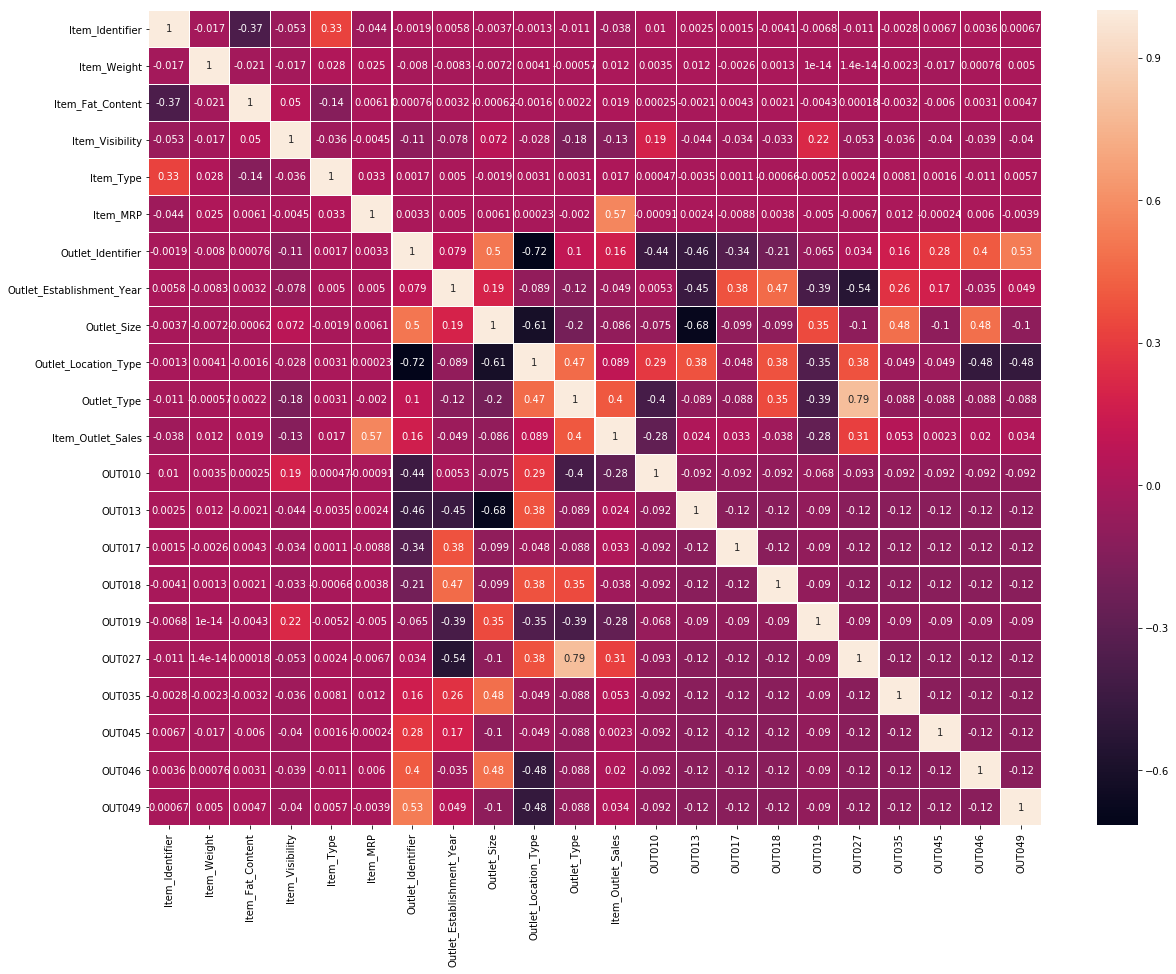

In [269]:
import seaborn as sn
plt.subplots(figsize=(20,15))
sn.heatmap(matrix, annot=True,  linewidths=0.2)
plt.show

In [270]:
Features = result[["Item_MRP","Outlet_Type",'OUT010','OUT013','OUT017','OUT018','OUT019','OUT027','OUT035','OUT045','OUT046','OUT049']].copy()
Target = df[["Item_Outlet_Sales"]].copy()

## Train Test Split

In [271]:
#split_value=round(len(Features) - len(Features)*0.25)
#x_train= np.array(Features[:split_value])
#x_test = np.array(Features[split_value:])
#y_train = np.array(Target[:split_value])
#y_test = np.array(Target[split_value:])

In [272]:
x_train= np.array(Features[:])
y_train = np.array(Target[:])

# Model

In [273]:
#from sklearn.linear_model import LinearRegression
#Lg = LinearRegression()
#Lg.fit(x_train,y_train)
#y_predict = Lg.predict(x_test)

In [274]:
x_train = x_train.transpose()  # n X m
y_train = y_train.transpose() #1 X m
#x_test  = x_test.transpose()
#y_test =  y_test.transpose()

[[2414.30038994 2719.51251762 2016.31213874 ... 1608.99222347
  1457.81536231 1326.34654685]]
Mean Squared Error is: 53180.75204892183


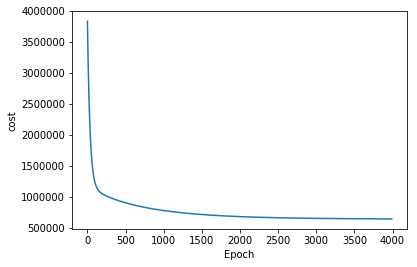

In [275]:
class Regression:
    def __init__(self,x_train):
        self.slope = np.zeros((1,(x_train.shape[0]))) # 1 x n
        self.Intercept = 0
    def Hypothesis_fn(self,x_train):
        h = np.dot(self.slope,x_train)+ self.Intercept  #slope= 1xn  and x_train =nXm  so, h=1xm
        return h
    def Cost_Function(self,h,y_train):
        m= y_train.shape[1]
        J=((1/(2*m))*(np.sum(np.square(h - y_train)))) #h=1xm y_train= 1xm
        return J
    def Gradient_descent(self,h,x_train,y_train):
        m = y_train.shape[1]
        dIntercept = (1/m)*(np.sum(h-y_train))
        dslope = (1/m)*np.dot((h-y_train),x_train.transpose())  # (h-y_train)=1xm x_train= mXn dslope=1Xn
        return dslope,dIntercept
    def train(self,x_train,y_train,iteration,learning_rate):
        cost=[]
        epoch_list=[]
        for i in range(iteration):
            h=self.Hypothesis_fn(x_train)
            J=self.Cost_Function(h,y_train)
            g=self.Gradient_descent(h,x_train,y_train)
            self.slope = self.slope - (learning_rate * g[0]) # slope 1Xn
            self.Intercept = self.Intercept- (learning_rate * g[1])
            if(i%10==0):
                cost.append(J)
                epoch_list.append(i)
        plt.plot(epoch_list,cost) #k[1] = Iteration and  k[0] = Cost
        plt.xlabel("Epoch")
        plt.ylabel("cost")    
    def predict(self,x_test):
        y_predict=np.dot(self.slope,x_test)+ self.Intercept
        return y_predict
        
epoch=4000
learning_rate=0.01
rg=Regression(x_train) # object Creation
rg.train(x_train,y_train,epoch,learning_rate)  # Train the Model
y_predict=rg.predict(x_test)  # make Prediction
mse_scratch= np.sum((y_predict-y_test)**2)  # Calculate mean squared Error
print(y_predict)
print("Mean Squared Error is:",(mse_scratch)**0.5)

In [276]:
#count=0
#for i in y_predict:
 #   if(i[0]<0):
  #      count=count+1
#count

In [277]:
#mse = np.sum((y_test - y_predict)**2)
#mse

In [278]:
#print(y_predict)

In [283]:
df_test = pd.read_csv("Submission.csv")

In [284]:
df_test

,Unnamed: 0,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,...,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
0,0,0.0,0.964275,0.0,0.012415,0.866667,0.323413,1.000000,0.583333,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,0.0,0.222983,1.0,0.108848,0.266667,0.235849,0.222222,0.916667,0.5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.5,0.598095,0.0,0.299905,0.733333,0.894140,0.000000,0.541667,0.5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,0.164335,0.0,0.036860,0.866667,0.524488,0.222222,0.916667,0.5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,0.484706,1.0,0.359348,0.266667,0.862069,0.555556,0.000000,0.5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,5,0.0,0.312295,1.0,0.188179,0.400000,0.363000,0.888889,0.500000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,6,0.0,0.880917,1.0,0.246871,0.000000,0.077210,0.333333,1.000000,0.5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,7,0.0,0.484706,0.0,0.038092,0.000000,0.209163,0.555556,0.000000,0.5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,8,0.0,0.104198,1.0,0.374240,0.866667,0.271756,0.777778,0.708333,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,9,0.0,0.085144,0.0,0.006583,0.000000,0.660288,0.222222,0.916667,0.5,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [285]:
Features_test = df_test[["Item_MRP","Outlet_Type",'OUT010','OUT013','OUT017','OUT018','OUT019','OUT027','OUT035','OUT045','OUT046','OUT049']].copy()

In [286]:
x_test_test = np.array(Features_test[:])

In [287]:
x_test_test  = x_test_test.transpose()

In [288]:
y_predict_test = rg.predict(x_test_test)

In [289]:
y_predict_test[0][0]

1874.6236070301377

In [290]:
y_predict_test=y_predict_test.transpose()

In [291]:
min_check=[]
for i in y_predict_test:
    #print(i[0])
    if(i[0]>0):
        min_check.append(i[0]) 
Minimum=min(min_check)
Minimum
#print(y_predict_test)

1.8716744103066532

In [292]:
for i in range(0,len(y_predict_test)):
    if(y_predict_test[i][0]<0):
        y_predict_test[i][0]=Minimum

In [293]:
count=0
for i in y_predict_test:
    if(i[0]<0):
        count=count+1
count

0

In [294]:
Result = pd.DataFrame(data=y_predict_test,columns=["Item_Outlet_Sales"])

In [295]:
T1=pd.read_csv("Test.csv")

In [296]:
Submit = T1[["Item_Identifier","Outlet_Identifier"]].copy()

In [297]:
Submit["Item_Outlet_Sales"]=Result

In [298]:
Submit

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1874.623607
1,FDW14,OUT017,1584.563332
2,NCN55,OUT010,1859.777718
3,FDQ58,OUT017,2552.801119
4,FDY38,OUT027,5039.381991
5,FDH56,OUT046,1915.027631
6,FDL48,OUT018,693.899242
7,FDC48,OUT027,2849.209819
8,FDN33,OUT045,1538.894873
9,FDA36,OUT017,3008.340825


In [299]:
Submit.to_csv("Final.csv")